# Анализ убытков приложения ProcrastinatePRO+

# Цель анализа: Определить причины убытков приложения

# Описание проекта

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Необходимо разобраться в причинах и помочь компании выйти в плюс

**Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:**

- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

**Изучить:**

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

# Описание данных

Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта. 

Файл orders_info_short.csv — информацию о заказах. 

Файл costs_info_short.csv — информацию о расходах на рекламу.

**Структура visits_info_short.csv:**

- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

**Структура orders_info_short.csv:**

- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

**Структура costs_info_short.csv:**

- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

## 1 Загрузим данные и подготовим их к анализу.

### 1.1 Импортируем необходимые библиотеки. Считаем данные из csv-файлов в датафреймы и сохраним в переменные

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st # импортируем необходимые библиотеки 

In [2]:
visits, orders, costs = (
    pd.read_csv('/Users/ilyasidorov/Downloads/visits_info_short.csv'), # Информация о посещениях
    pd.read_csv('/Users/ilyasidorov/Downloads/orders_info_short.csv'), # Информация о заказах
    pd.read_csv('/Users/ilyasidorov/Downloads/costs_info_short.csv') # информация о расходах на рекламу
) # читаем csv-файл

### 1.2 Изучим общую информацию о данных

In [3]:
display(visits.head())
display(orders.head())
display(costs.head()) # Посмотрим первые строки датафрейма

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [4]:
display(visits.tail())
display(orders.tail())
display(costs.tail()) # Посмотрим на последние строки датафрейма 

,User Id,Region,Device,Channel,Session Start,Session End
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55
309900,109329042535,Germany,PC,lambdaMediaAds,2019-10-31 14:17:43,2019-10-31 15:17:04


,User Id,Event Dt,Revenue
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99
40211,329994900775,2019-10-31 13:29:06,4.99


,dt,Channel,costs
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8
1799,2019-10-27,lambdaMediaAds,12.0


In [5]:
display(visits.info())
display(orders.info())
display(costs.info())# Общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

In [6]:
display(visits.describe())
display(orders.describe())
display(costs.describe())# Посмотрим на статистику по всем числовым столбцам

,User Id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11


,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


In [7]:
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum()) # Дубликаты

0

0

0

**Вывод:**

- В датафрейме visits 6 колонок и 309900 строк. 
- В датафрейме orders 3 колонки и 40212 строк.
- В датафрейме costs 3 колонки и 1800 строк.

Пропуски и дубликаты в данных отсутсвуют. 
Названия столбцов имеют заглавные буквы и пробелы, что неудобно при обработке и анализе данных

Прблемы, которые необходимо решить:

- Исправить названия столбцов (привести к нижнему регистру и заменить пробелы) 
- Изменить тип данных в стобце с датой и временем 



### 1.3 Предобработка данных

In [8]:
costs.columns = costs.columns.str.lower() # приведем к нижнему регистру названия столбцов 

In [9]:
visits.columns = ['user_id', 'region', 'device','channel', 'session_start', 'session_end']
orders.columns = ['user_id', 'event_dt','revenue'] # переменуем названия столбцов

In [10]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date # преобразуем данные о времени

**Вывод:**

- Заглавные буквы и пробелы в названиях столбцов были заменены на строчные буквы и нижние подчеркивания. 
- Типы данных в столбцах с датами были преобразованы из строк в datetime64.

## 2 Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

### 2.1 Функции для расчёта и визуализации LTV и ROI

In [11]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [12]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(30, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV', fontsize=25)

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon), fontsize=25)

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей', fontsize=25)


    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI', fontsize=25)

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon), fontsize=25)
    plt.tight_layout()
    plt.show()

### 2.2 Функции для расчета и визуализации удержания 

In [13]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [14]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### 2.3 Функции для расчета и визуализации конверсии

In [15]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [16]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [17]:
# функция для сглаживания фрейма
def filter_data(df, window): # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

**Вывод:**

Созданы функции для расчёта, визуализации и анализа LTV, ROI, удержания и конверсии:

**LTV** - Сколько суммарно каждый пользователь в итоге потратит (сумма денег, которую в среднем приносит один клиент с покупок) 

**ROI** - Окупаемость инвестиций (Показывает, какое количество денег, потраченных на продукт вернется в виде прибыли)

**Retention Rate** - Удержание пользователей (как долго клиенты остаются с компанией).

**CR** - Доля людей, перешедших из одного состояния в другое (оплата покупки).

## 3 Исследовательский анализ данных

### 3.1 Профили пользователей

In [18]:
# функция для создания пользовательских профилей
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
 
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [19]:
profiles = get_profiles(visits, orders, costs)
profiles # Получим профили пользователей

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


**Вывод:**

Создана функция создания профилей 

### 3.2 Определим минимальную и максимальную даты привлечения пользователей

In [20]:
min_analysis_date = costs['dt'].min()
min_analysis_date # минимальная дата привлечения пользователей

datetime.date(2019, 5, 1)

In [21]:
mix_analysis_date = costs['dt'].max()
mix_analysis_date # максимальная дата привлечения пользователей

datetime.date(2019, 10, 27)

**Вывод:**

Минимальная дата привлечения пользователей - 1 мая 2019 г. 

Максимальная дата привелечения пользователей - 27 октября 2019 г.

Минимальная и максимальная даты привлечения пользователей соответствуют условиям проекта (ТЗ).

### 3.3 Количество пользователей на страну и доля платящих пользователей из каждой страны

In [22]:
region = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'mean'}) \
         .sort_values(by='payer', ascending=False)
region

,user_id,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


**Вывод:**

Пользователи приходят в приложение из Соединенных Штатов, Великобритании, Германии и Франции.

- Больше всего пользователей приходится на Соединенные Штаты (более 100 тысяч). Далее идут Великобритания (17,5 тысяч), Франция (17,45 тысяч) и Германия (почти 15 тысяч).
- Доля платящих пользователей в США превышает остальные страны почти в два раза и составляет 6,9% от общего числа пользователей.  

### 3.4 Устройства платящих и неплатящих пользователей

In [23]:
device = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
device

user_id payer          
        nunique   sum      mean
device                         
Android   35032  2050  0.058518
Mac       30042  1912  0.063644
PC        30455  1537  0.050468
iPhone    54479  3382  0.062079

**Вывод:**

Пользователи приложения используют такие устройсва, как Iphone, Android, Mac и PC. 

Самым популярным устройством является Iphone (почти 55 тыс). Устройством Android пользуются 35 тысяч пользователей. 

Платящие пользователи предпочитают Mac. Их доля составляет 6,3%. 
Доля платящих пользователей для iPhone - 6,2%.
Доля платящих пользователей для Android - 5,8%.
Доля платящих пользователей для PC - 5%.

### 3.5 Каналы привлечения пользователей. 

In [24]:
channel = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
channel 

user_id payer          
                   nunique   sum      mean
channel                                   
AdNonSense            3880   440  0.113402
FaceBoom             29144  3557  0.122049
LeapBob               8553   262  0.030633
MediaTornado          4364   156  0.035747
OppleCreativeMedia    8605   233  0.027077
RocketSuperAds        4448   352  0.079137
TipTop               19561  1878  0.096007
WahooNetBanner        8553   453  0.052964
YRabbit               4312   165  0.038265
lambdaMediaAds        2149   225  0.104700
organic              56439  1160  0.020553

**Вывод:**

Всего рекламных источников - 10. 

- Более 30% пользоватлей приложения пришли самостоятельно (по рекомендации, через поиск или случайно). Доля платящих клиентов всего 2%. Это самый низкий показатель среди всех каналов привлечения. 

- Если учитывать только рекламные источники, то самое большое количество пользователей пришло из FaceBoom (29144 пользователей) и TipTop (19561 пользователей). 

**Наиболее эффективные каналы привлечения:** 

- FaceBoom (доля платящих клиентов - 12%)
- AdNonSense (доля платящих клиентов - 11%)
- lambdaMediaAds (доля платящих клиентов - 10%)

## 4 Маркетинг

### 4.1 Общая сумма расходов на маркетинг

In [25]:
total_costs = round(costs.costs.sum())
total_costs # всего расходов на рекламу

105497

**Вывод:**

Общая сумма расходов на маркетинг составила - 105497. 

### 4.2 Сколько денег потрачено на каждый источник

In [26]:
costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**Вывод:**

Самые большие расходы пришлись на канал TipTop - 54 751 и FaceBoom - 32 445. Расходы на остальные каналы значительно ниже. Например, на третьем месте канал WahooNetBanner с расходами в 5151. 

### 4.3 Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику

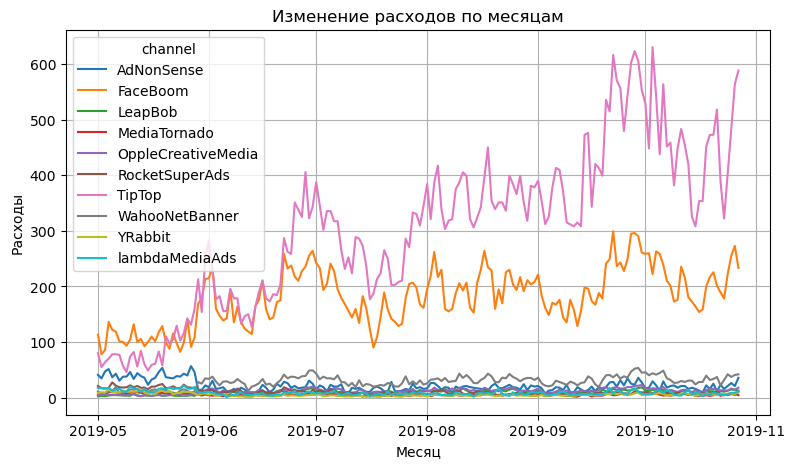

In [27]:
costs.pivot_table(
    index='dt',  # месяц проведения рекламной кампании
    columns='channel',  # рекламный источник
    values='costs',  # расходы 
    aggfunc='sum'  # подсчёт трат на рекламу
).plot(figsize=(20, 5), ax = plt.subplot(1, 2, 1), grid=True) # размер и сетка

plt.title('Изменение расходов по месяцам') # название
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show()

In [28]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [29]:
costs['week'] = costs['dt'].dt.isocalendar().week 

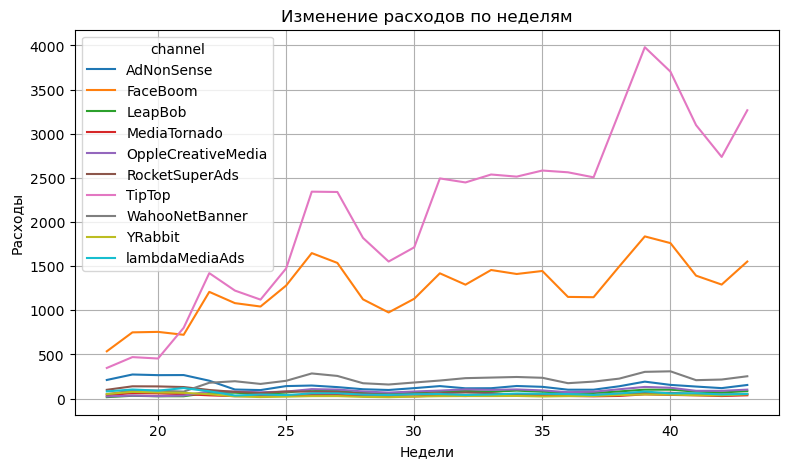

In [30]:
costs.pivot_table(
    index='week',  # неделя проведения рекламной кампании
    columns='channel',  # рекламный источник
    values='costs',  # расходы 
    aggfunc='sum'  # подсчёт трат на рекламу
).plot(figsize=(20, 5), ax = plt.subplot(1, 2, 1), grid=True) # размер и сетка

plt.title('Изменение расходов по неделям') # название
plt.xlabel('Недели')
plt.ylabel('Расходы')
plt.show()

**Вывод:**

- С мая 2019 по октябрь 2019 года наблюдается рост расходов на рекламу у двух каналов привлечения: TipTop и FaceBoom. В октябре 2019 года затраты на рекламу начали снижаться. Самые большие расходы на рекламу были в конце сентября.
- Объем расходов на рекламу у других 8 каналов практически не изменяется. 

### 4.4 Средняя стоимость привлечения одного пользователя (CAC) из каждого источника

In [31]:
CAC = (profiles.groupby('channel')
       .agg({'user_id': 'nunique', 'acquisition_cost': 'mean'})
       .sort_values(by='acquisition_cost', ascending=False)
      )
CAC # средний CAC по каждому источнику привлечения пользователей

,user_id,acquisition_cost
channel,,
TipTop,19561,2.799003
FaceBoom,29144,1.113286
AdNonSense,3880,1.008054
lambdaMediaAds,2149,0.724802
WahooNetBanner,8553,0.602245
RocketSuperAds,4448,0.412095
OppleCreativeMedia,8605,0.250000
YRabbit,4312,0.218975
MediaTornado,4364,0.218717


**Вывод:** 

Самая высокая средняя стоимость привлечения одного пользователя у канала TipTop (2,79). Далее идут FaceBoom (1,1) и AdNonSense (1).

**Общий вывод по маркетингу:**

- Общая сумма расходов на маркетинг составила - 105 497. 

- Самые большие расходы пришлись на канал TipTop - 54 751 и FaceBoom - 32 445. Расходы на другие каналы оказались существенно ниже.

- График изменения расходов на маркетинг показывает, что расходы на канал TipTop растут с каждой неделей. Пиковые значения были достигнуты в конце сентября 2019 года. Расходы канала FaceBoom также расли с каждым месяцем, но объем расходов ниже, чем у канала TipTop. Остальные каналы привлечения пользователей значительно уступают в объемах расходов на рекламу и практически не изменяются в периоде с мая 2019 по октябрь 2019 года. 

- Средняя стоимость привлечения одного пользователя из канала TipTop составляет 2,79. Это в разы выше чем у остальных каналов привлечения. Вложения в рекламу у этого канала необосновано высокие. Половина бюджета на рекламу приходится на этот канал. 

## 5 Оценка окупаемости рекламы

### 5.1 Окупаемость рекламы

In [32]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа 01 ноября 2019 года

In [33]:
horizon_days = 14  # определим горизонт анализа в 14 дней

Исключим пользователей, которые пришли самостоятельно

In [34]:
profiles = profiles.query('channel != "organic"') # исключим органических пользователей из анализа

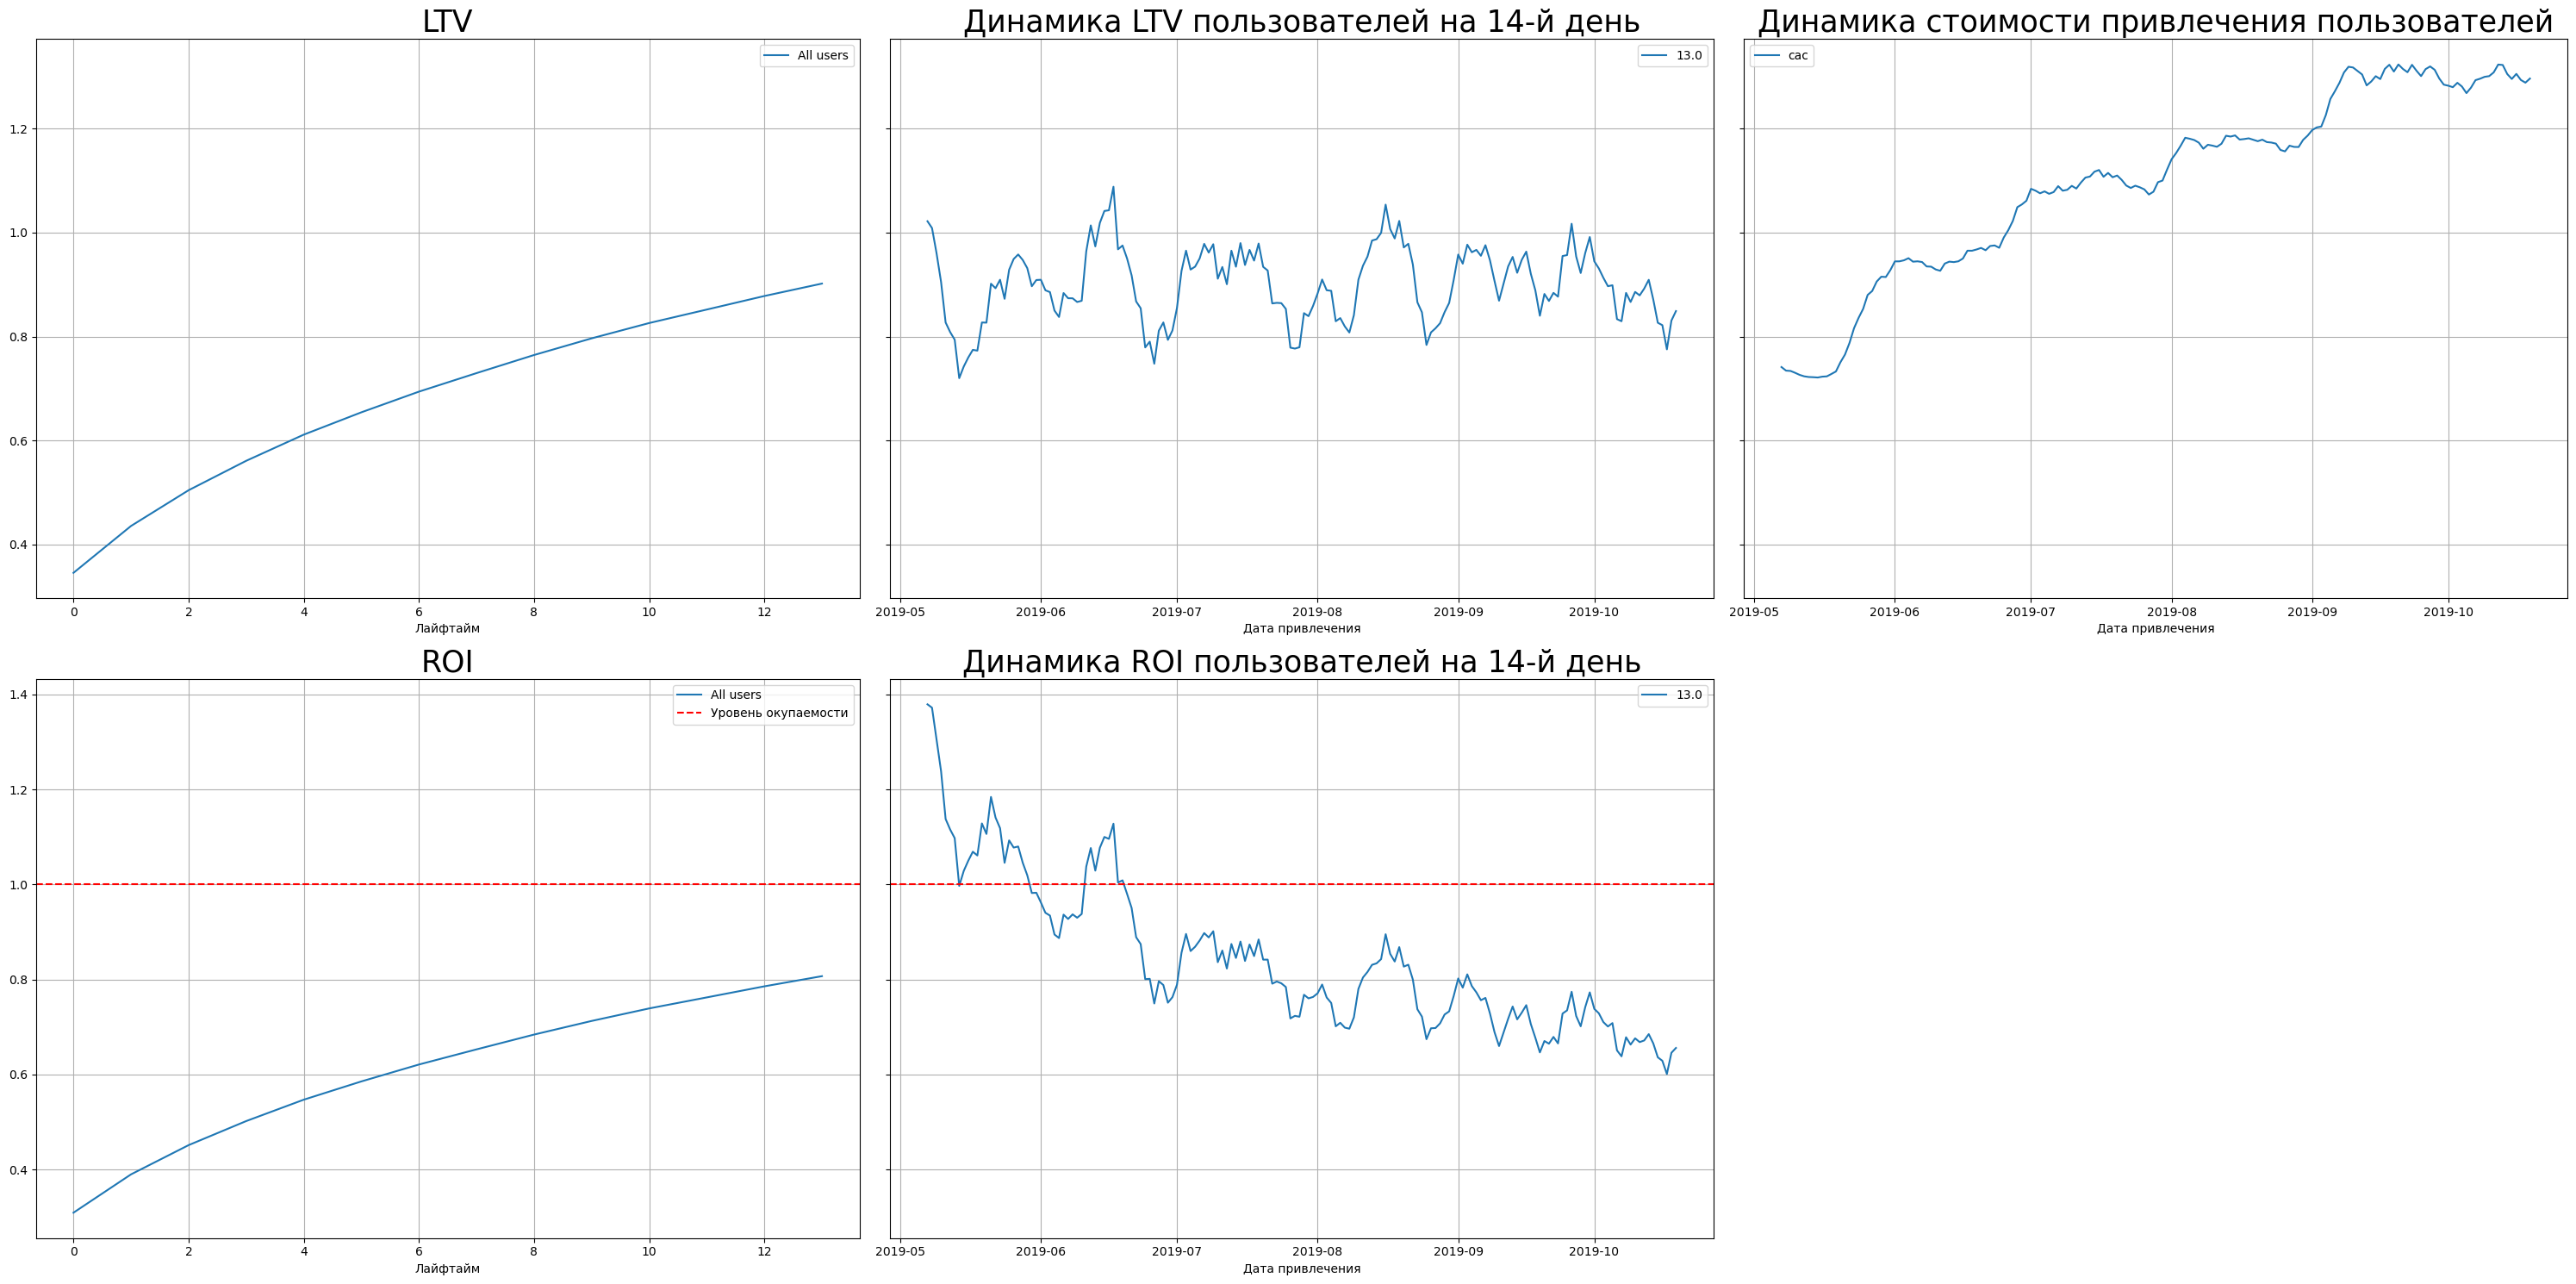

In [35]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:** 

По графикам можно сделать такие выводы:

- Показатель LTV стабильно растет.

- Стоимость привлечения пользователей растет со временем. 

- Реклама не окупается. Показатель ROI к концу второй неделе чуть выше 80% (ниже уровня окупаемости). Динамика ROI пользователей со временем снижается. 

### 5.2 Конверсия и удержание пользователей

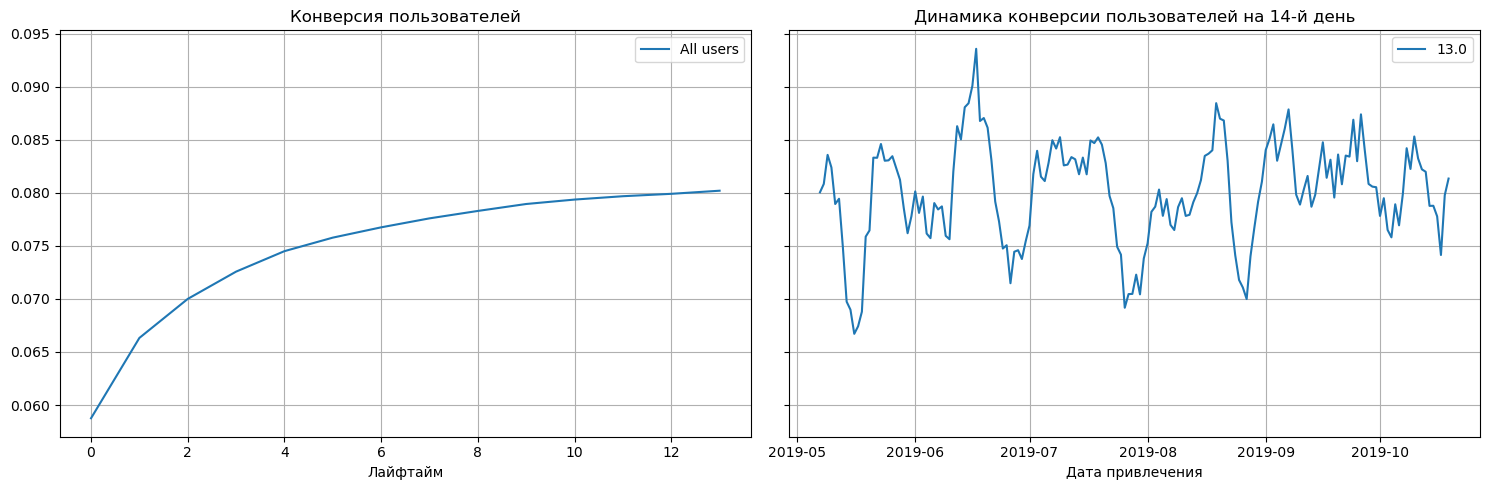

In [36]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:** 

Конверсия хорошо растет в первые четыре дня жизни пользователей, после чего рост продолжается, но не такими темпами. 

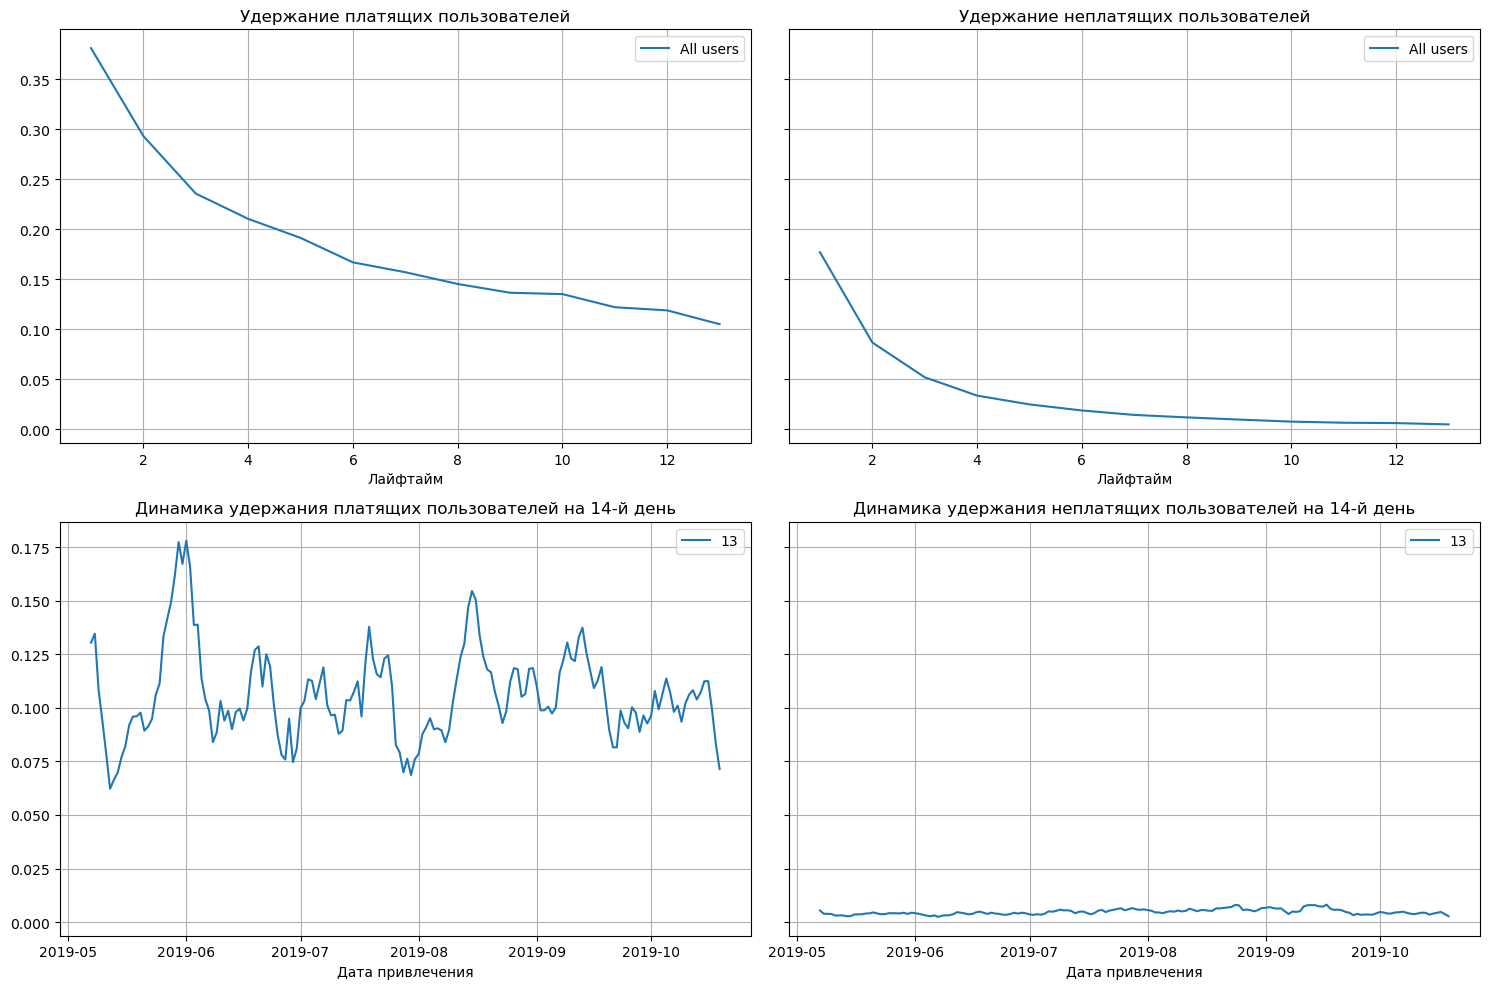

In [37]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**

- Пользователи приложения плохо удерживаются. 

- Удержание платящих пользователей в первые дни жизни составляет менее 40%. А под конец второй недели показатель удержания скатывается до 11%. 

- График динамики удержания говорит о том, что по истечению 2х недель после привлечения остается в среднем 10% пользователей. 

- Процент удержания неплатящих пользователей еще хуже. На 14 день после привлечения в среднем остается около 2% пользователей.

### 5.3 Окупаемость рекламы с разбивкой по устройствам

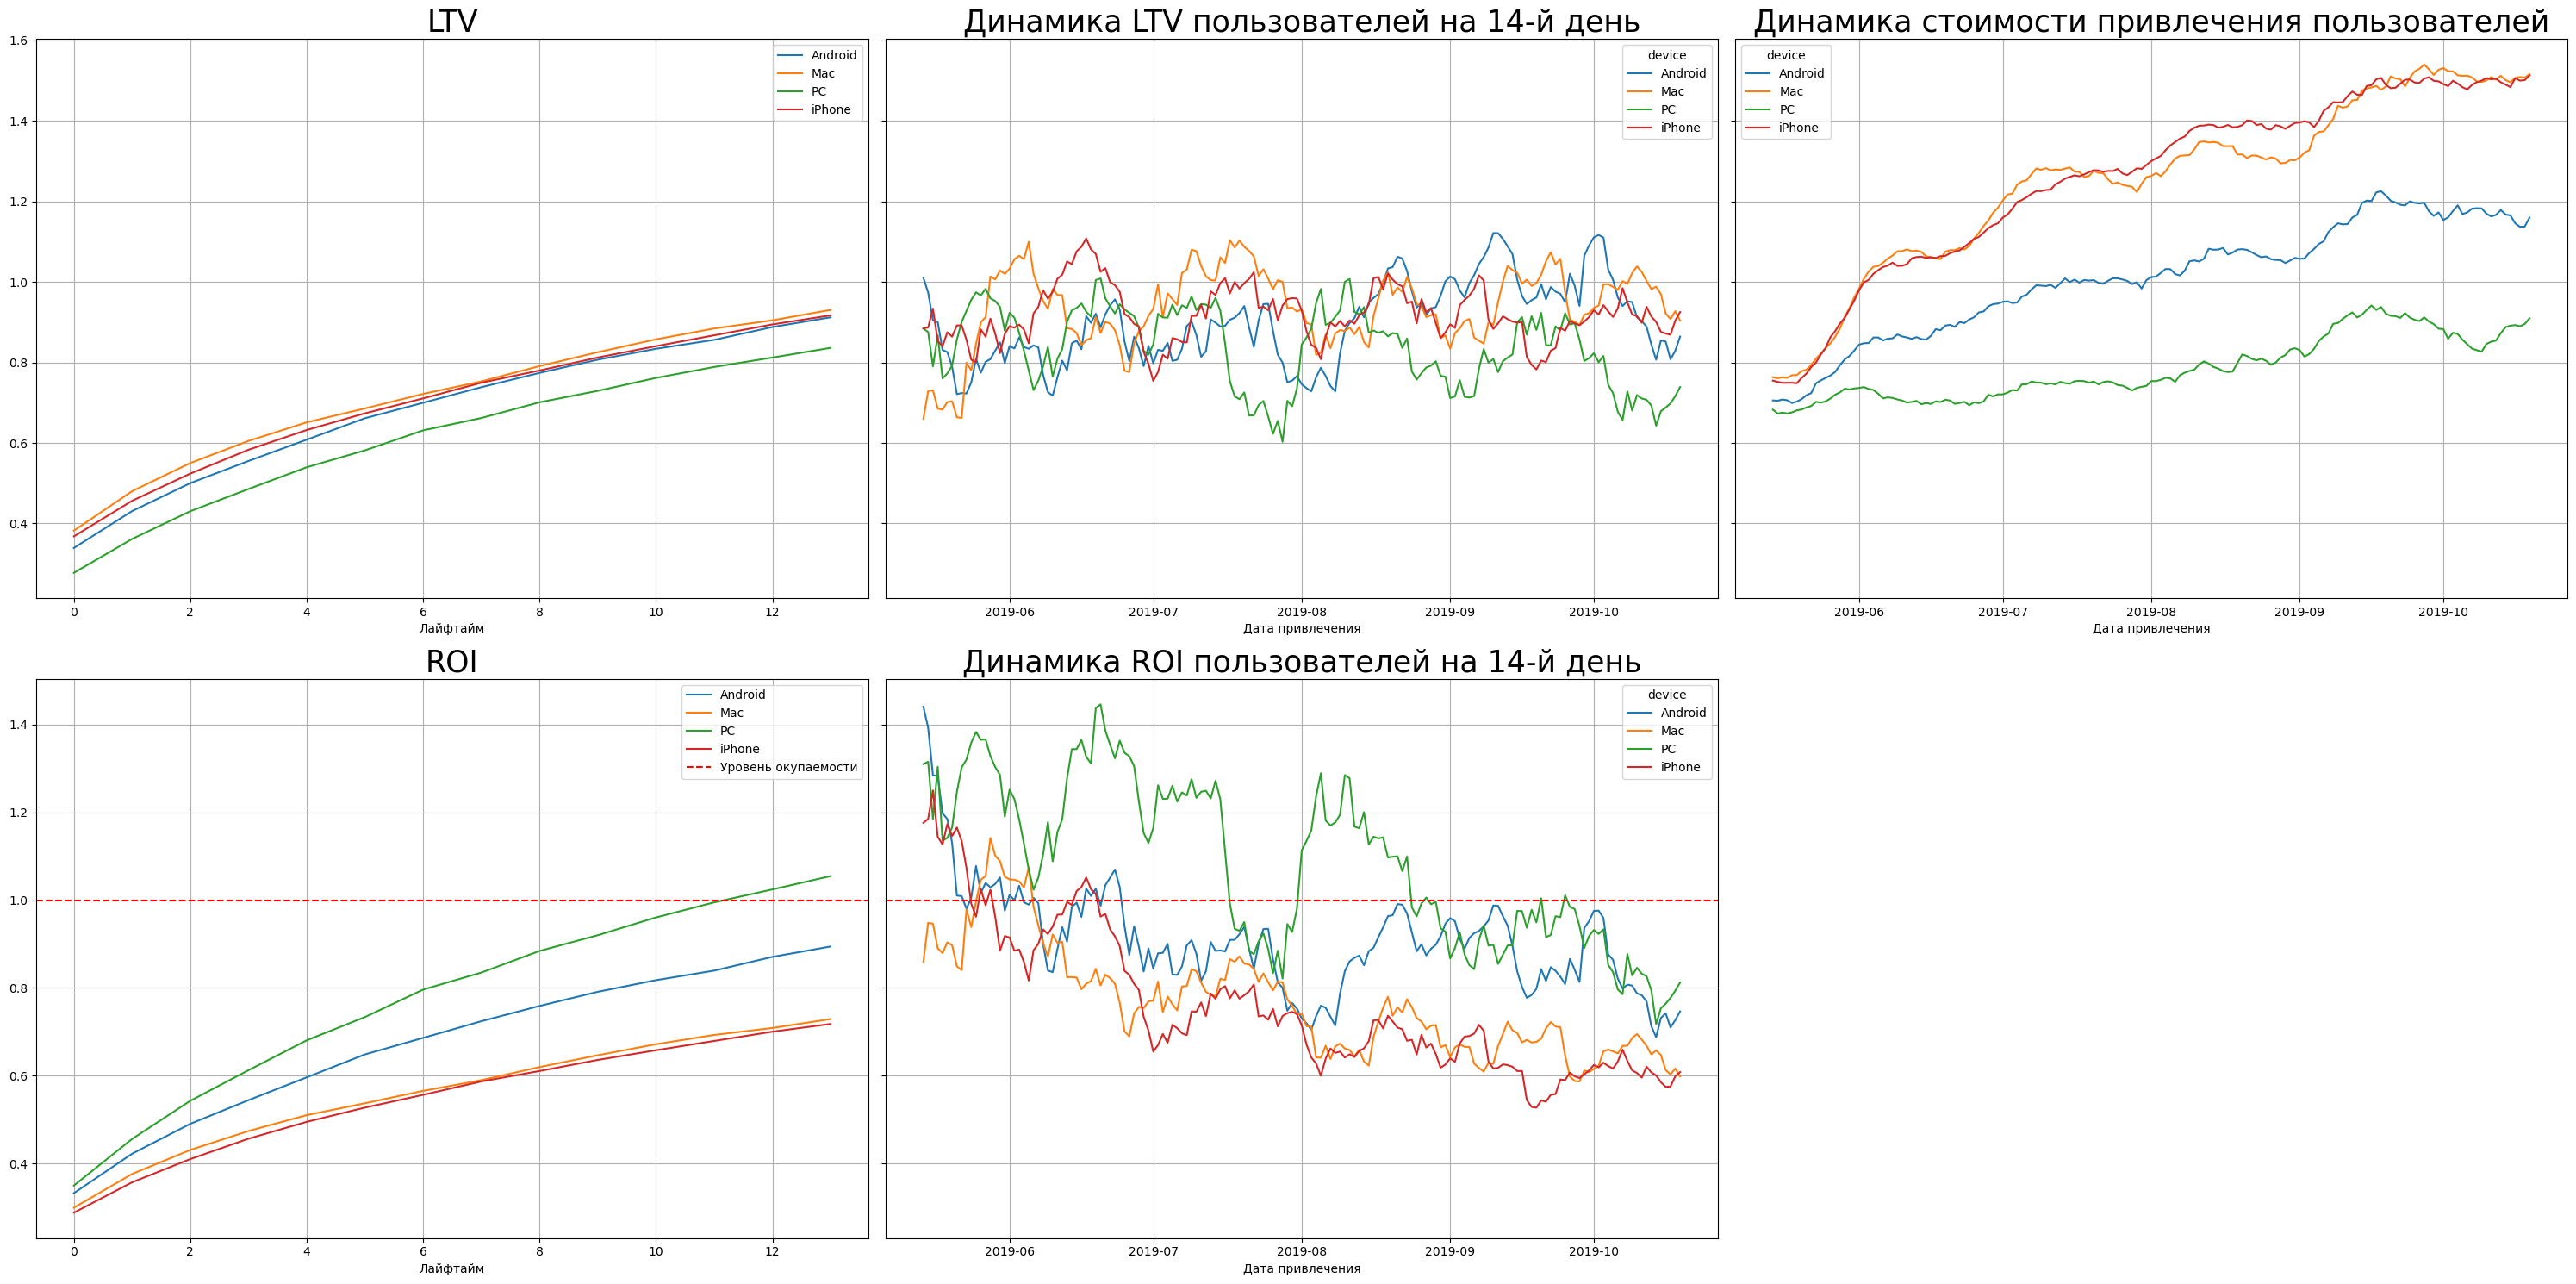

In [38]:
# окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

**Вывод:**

- Показатель LTV по всем устройствам стабильно растет. Выделяются пользователи, которые используют PC (LTV ниже чем у других). При этом окупаются только те пользователи, которые используют PC.
- Самая низкая стоимость привлечения пользователей у устройства PC. Самая высокая у Iphone и Mac.
- Динамика ROI говорит о том, что в первые 2 месяца окупались все пользователи. В последние месяцы окупаемость пользователей всех устройств ушла в минус. 

### 5.4 Окупаемость рекламы с разбивкой по странам

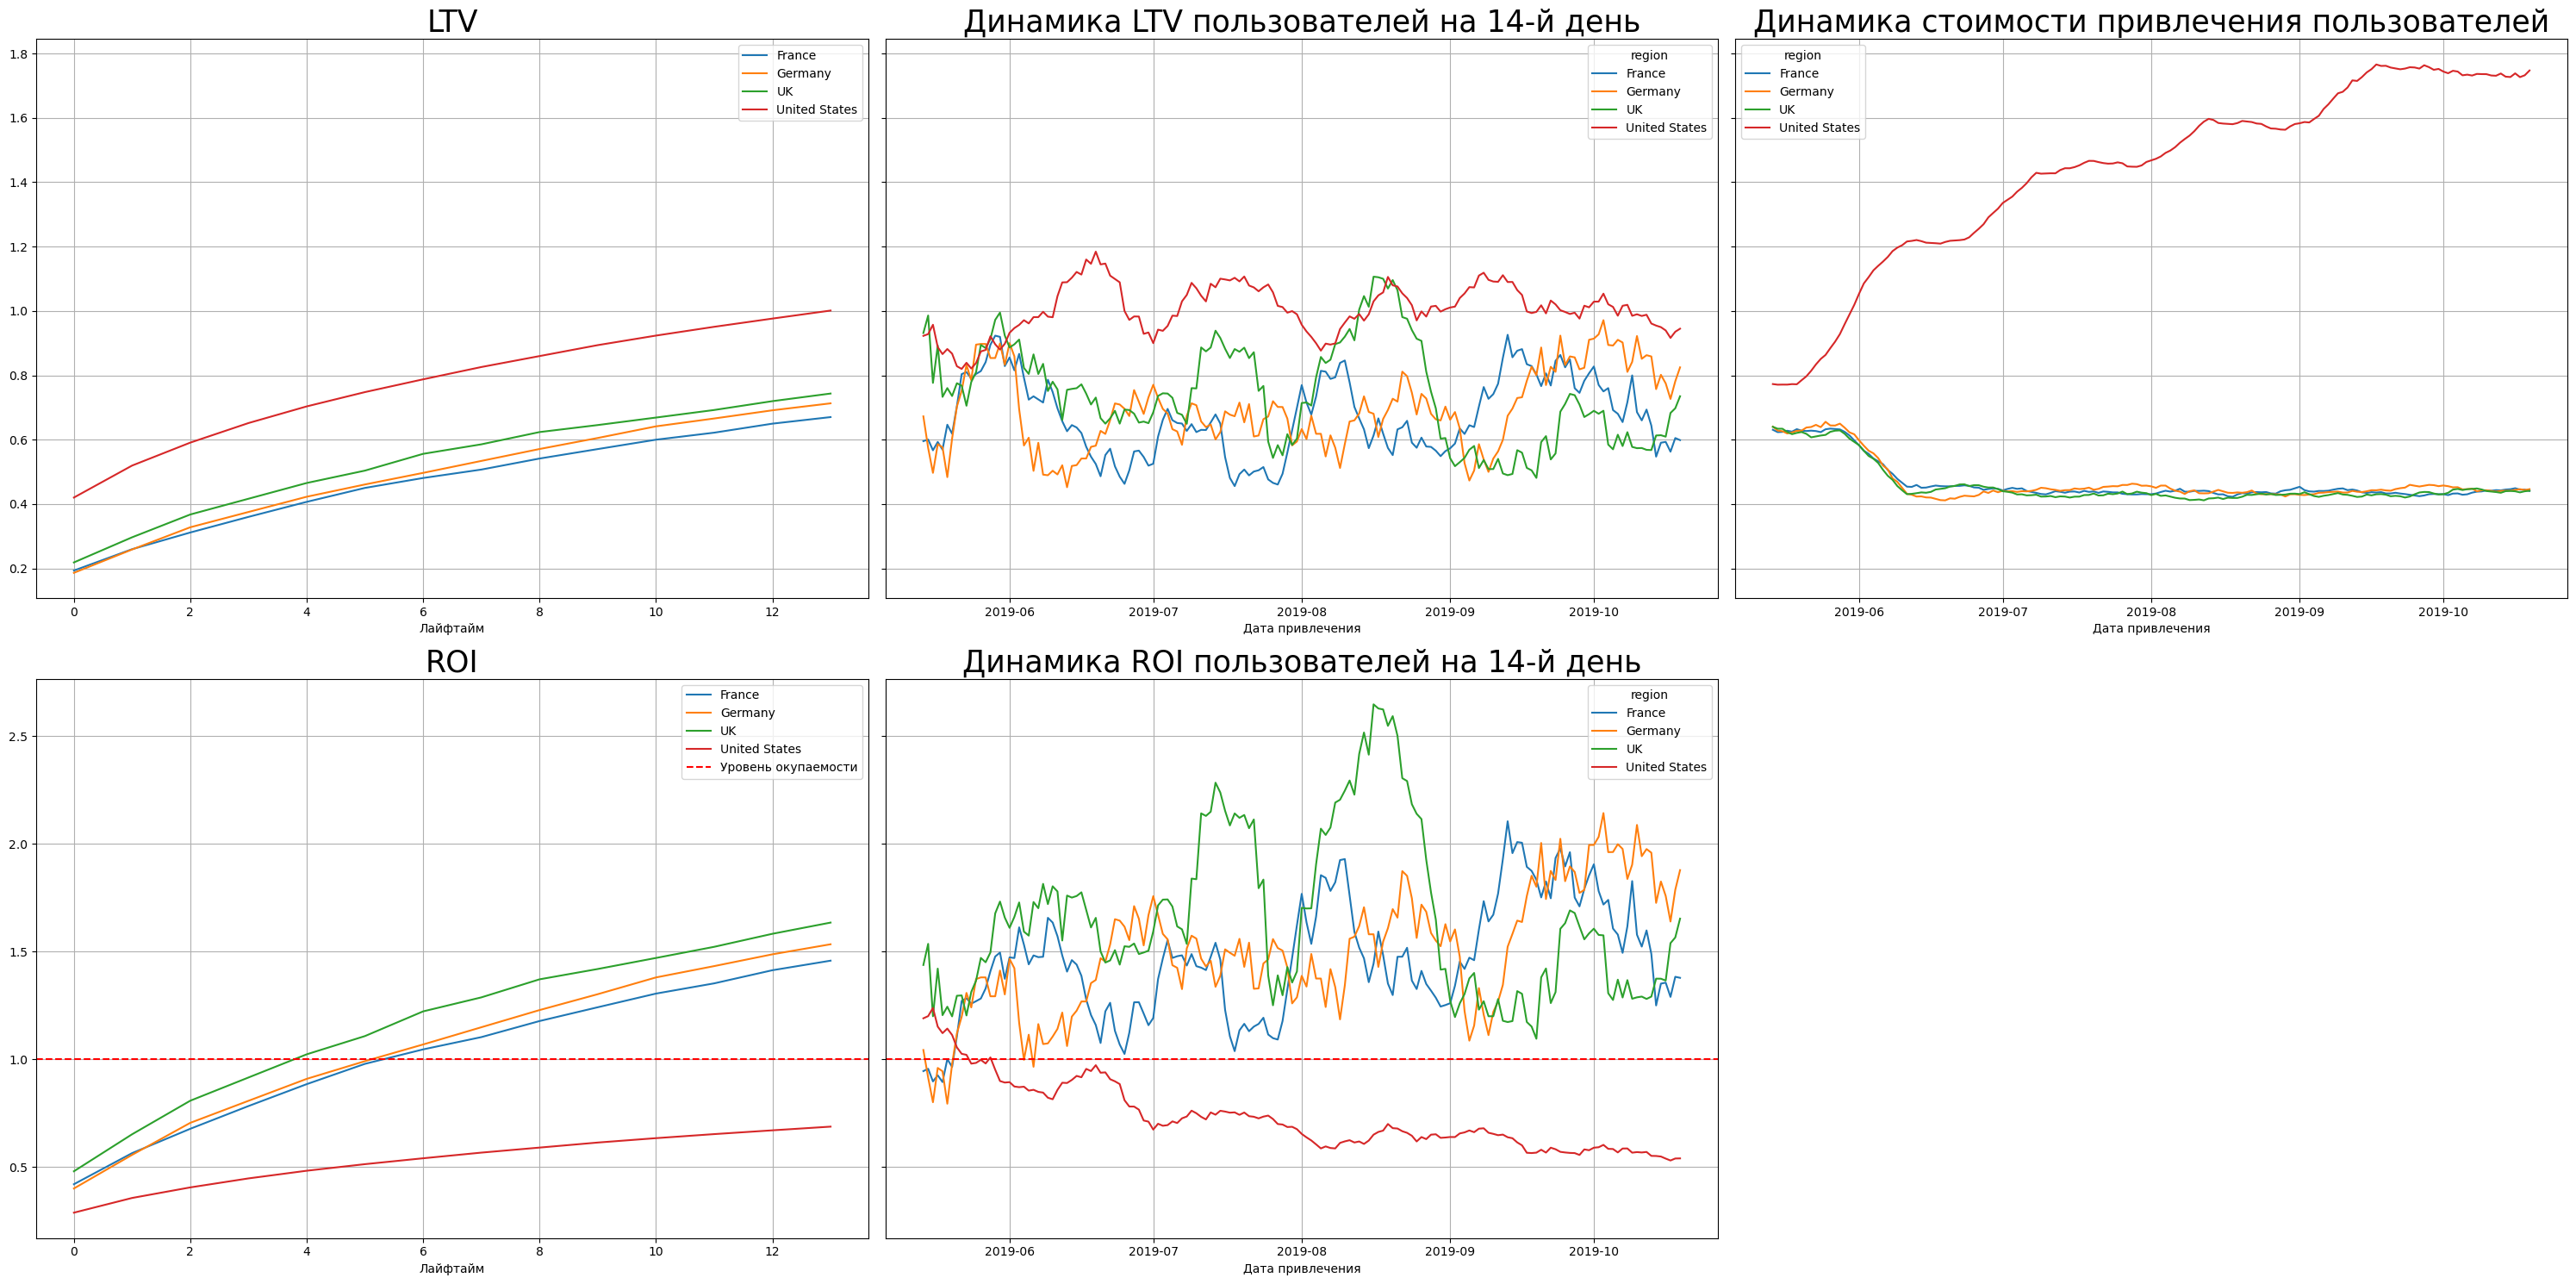

In [39]:
# окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

**Вывод:**

- LTV в США выше, чем в остальных странах. В целом пользователи из США приносят больше денег, чем пользователи из других стран. 
- Несмотря на высокий показатель LTV, реклама в США не окупается. При этом расходы на привлечение пользователей в США значительно привышают расходы по другим странам. 
- Динамика окупаемости пользователей из США снижается. 

### 5.5 Окупаемость рекламы с разбивкой по рекламным каналам

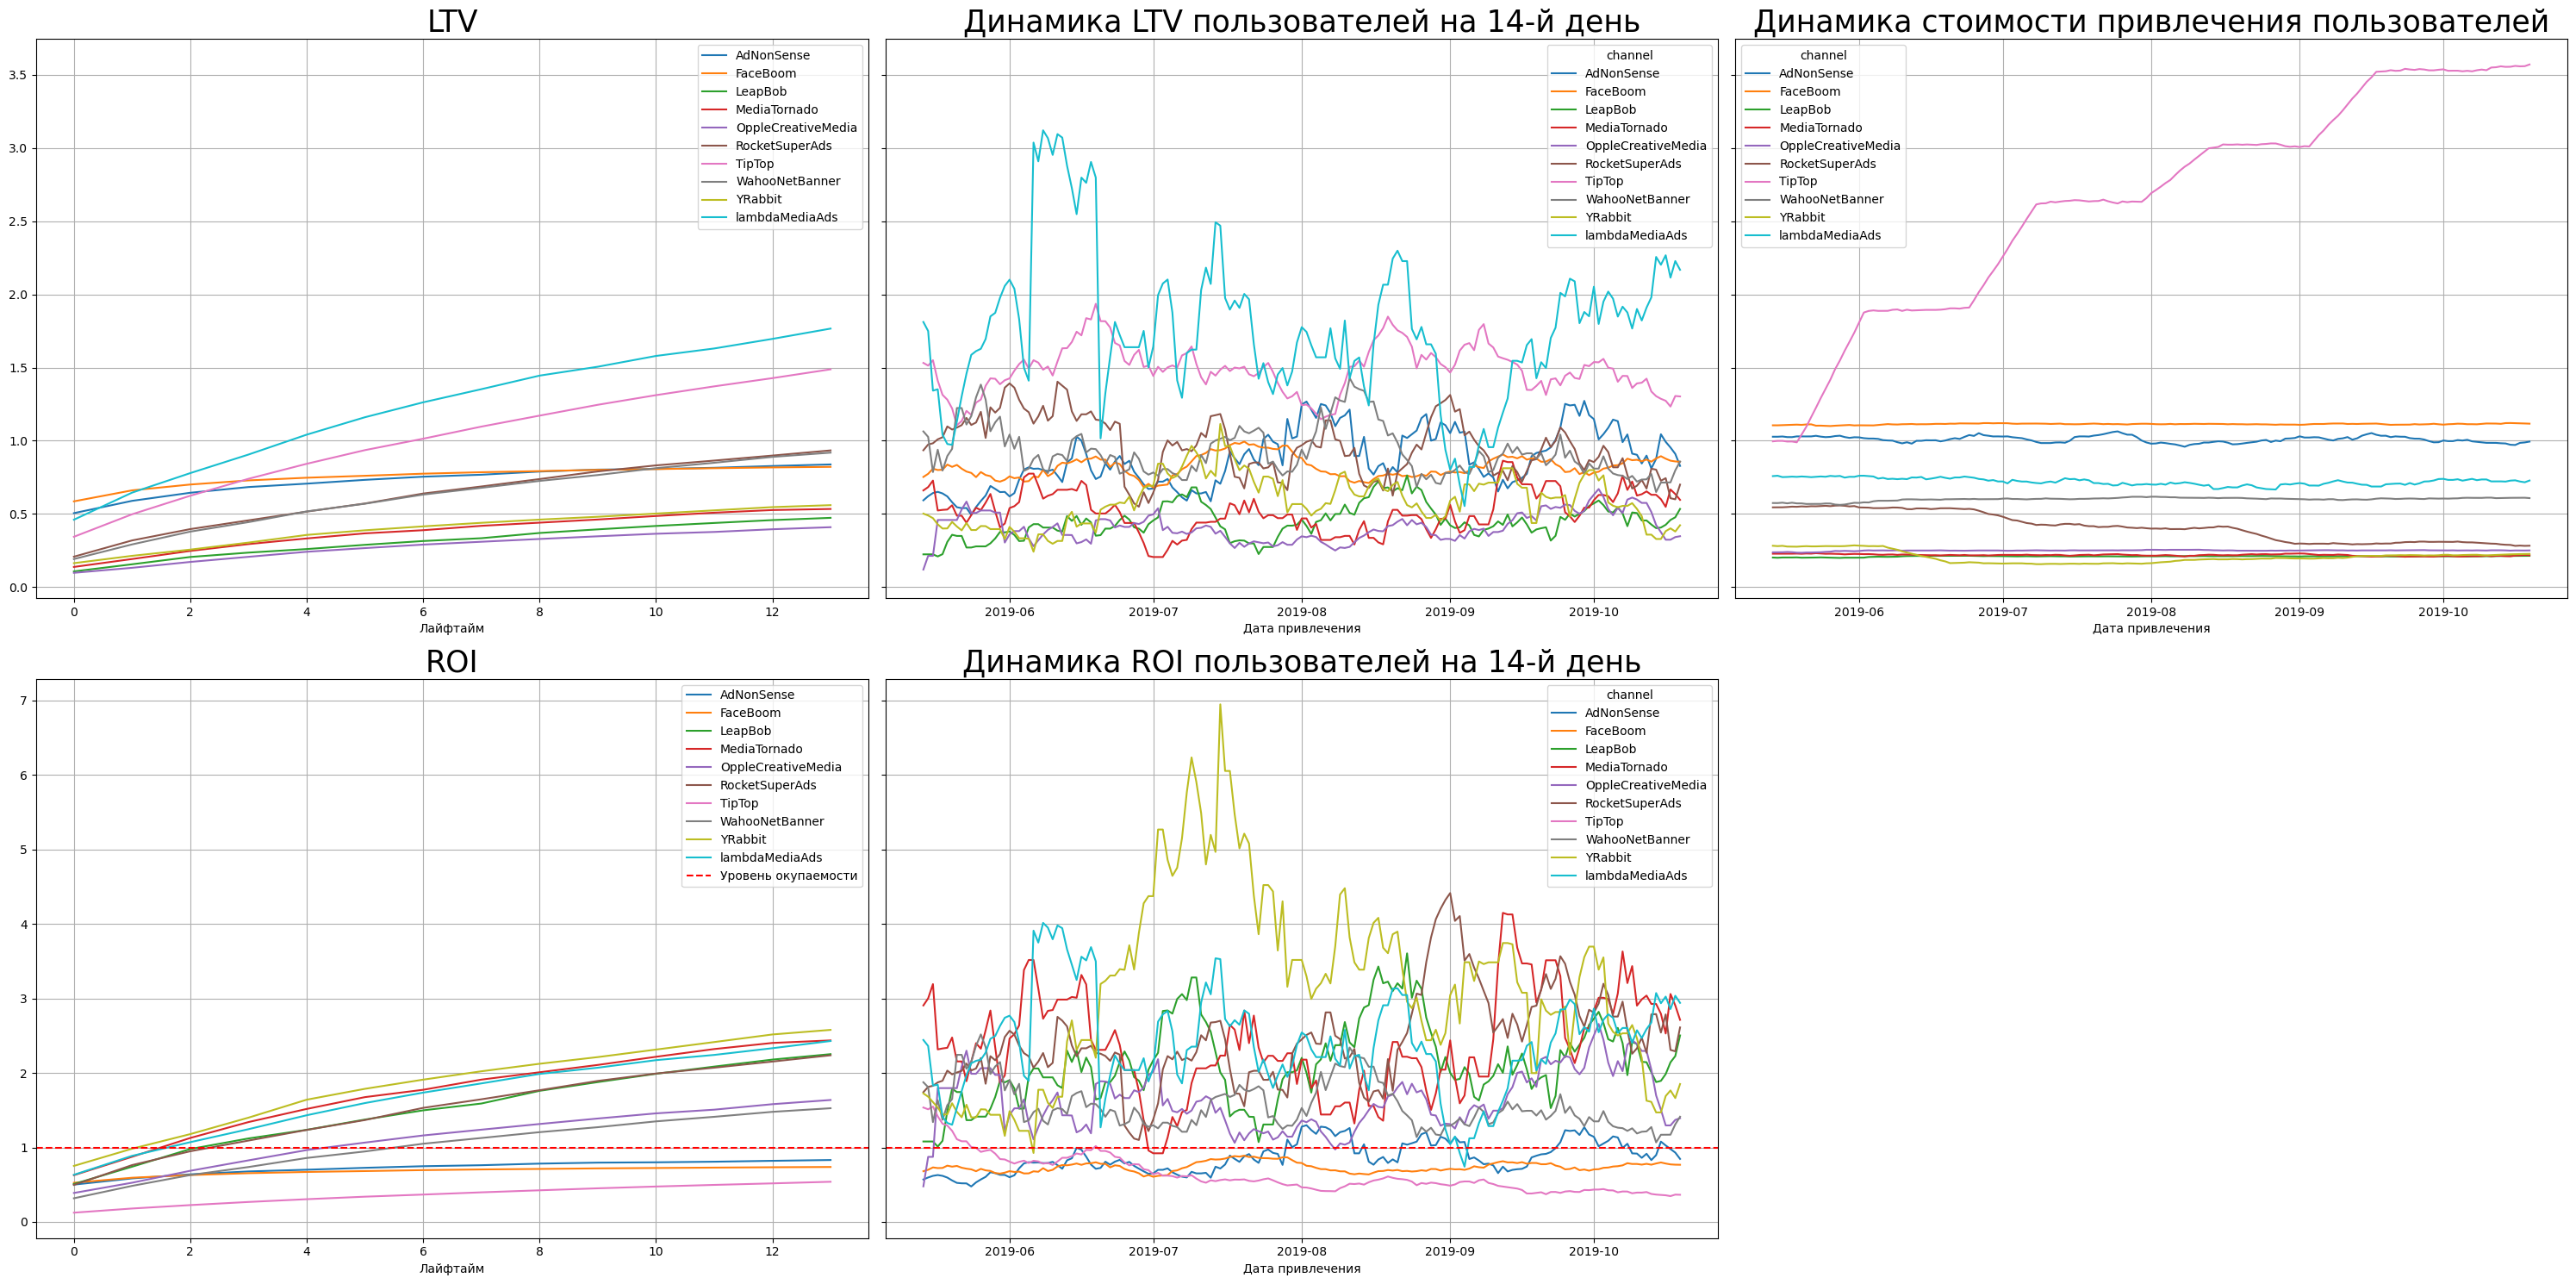

In [40]:
# окупаемость с разбивкой по рекламным каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

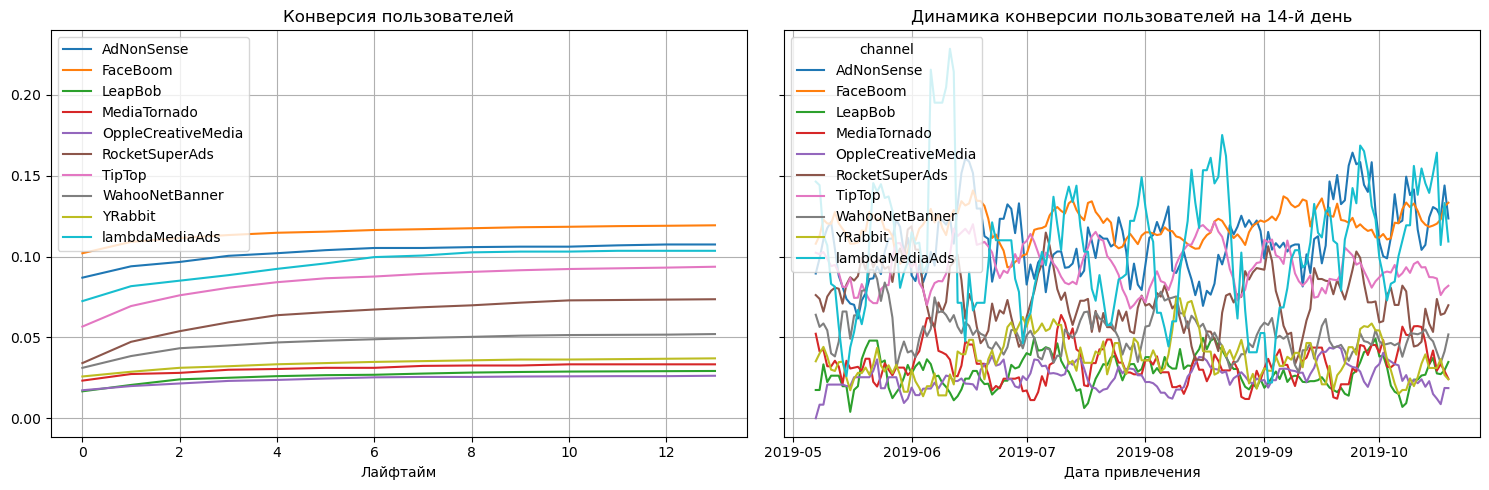

In [41]:
# конверсия по каналам привлечения

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

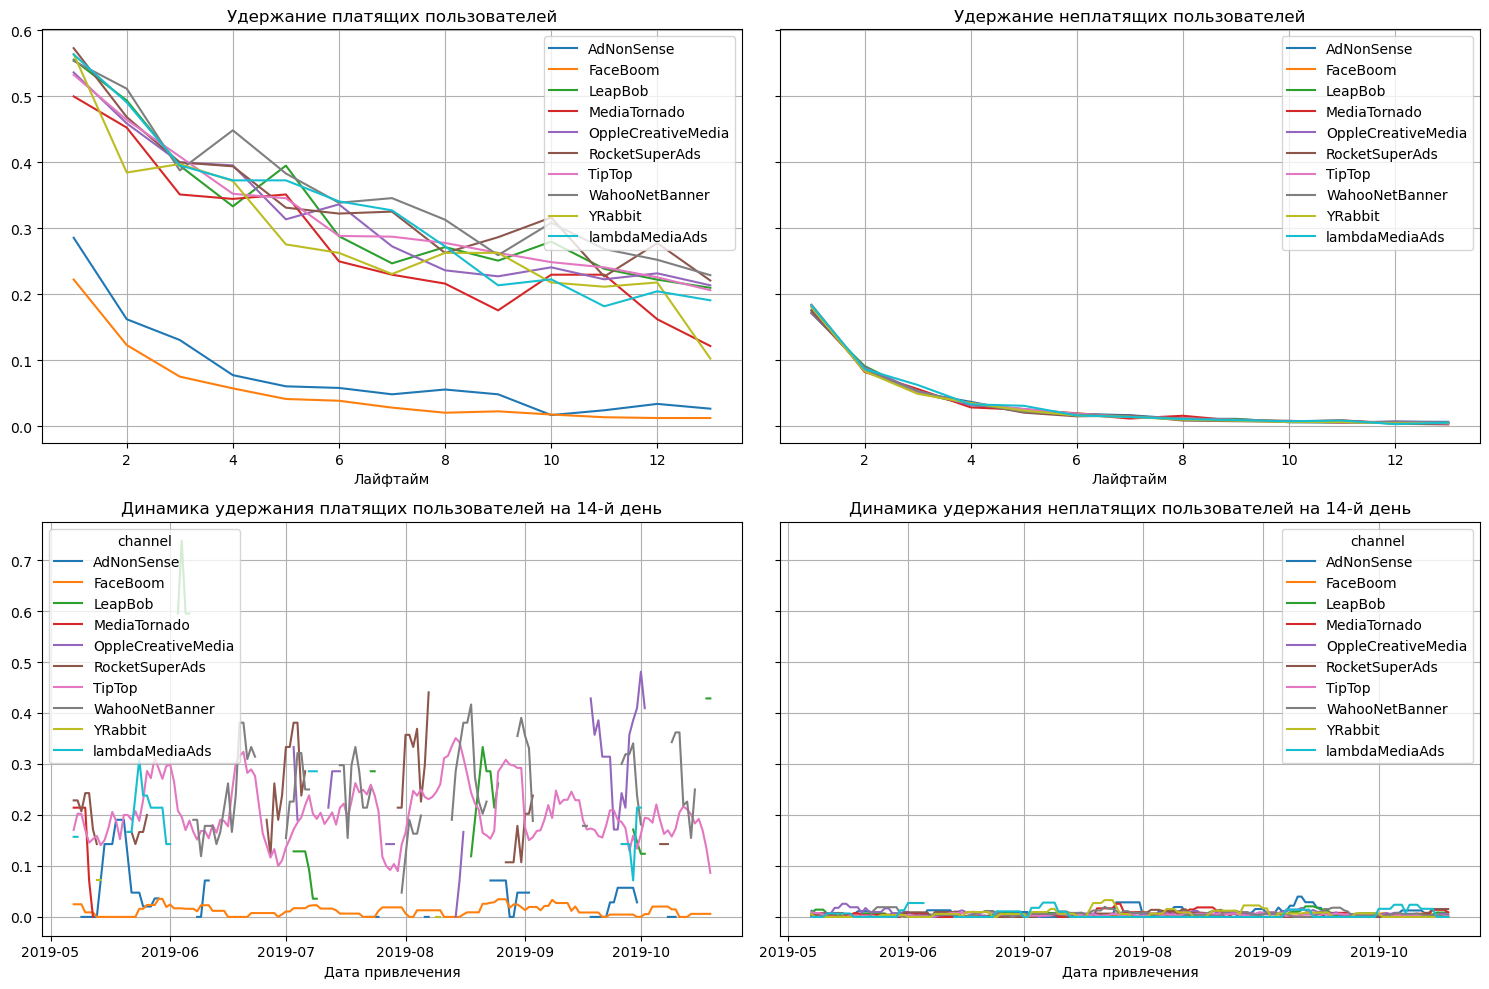

In [42]:
# удержание по каналам привлечения

dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**

-  Показатель LTV у всех каналов растет.

- Самая высокая стоимость привлечения пользователей у канала TipTop. А показатель окупаемости рекламы самый низкий.

- У остальных каналов динамика стоимости привлечения пользователей практически не изменяется. 

- Каналы TipTop, FaceBoom и AdNoneSense находятся ниже уровня окупаемости рекламы. Остальные каналы привлечения окупили расходы. 

- Конверсия пользователей у канала Face Boom самая высокая среди остальных, но показатель удержания пользователей самый низкий. Клиенты платят, но надолго не задерживаются. Тоже самое можно отметить и у канала AdNonSense.

**Общий вывод по окупаемости рекламы:**

В период с 01.05.2019 по 27.10.2019 года вложения в рекламу не окупились. На протяжении всего периода стоимость привлечения пользователей росла, а окупаемость снижалась. 

**Основные причины:**

- Слишком большие расходы пришлись на канал TipTop (более половины бюджета на рекламу). Средняя стоимость пользователя у канала в разы превышает остальные. Показатель ROI не достиг уровня окупаемости. У каналов Face Boom и AdNonSense хороший показатель конверсии, но показатели удержания платящих пользователей и окупаемость самые низкие из всех.

- Существенные расходы на рекламу в США не оправдались. Показатель окупаемости рекламы демонстрировал убытки только у США. 

- Окупились пользователи с устройством PC. При этом расходы на привлечение пользвателей с устройством PC оказались самыми низкими. Остальные устройства показали результаты ниже уровня окупаемости, при том, что расходы на привлечение были выше, чем на пользователей с PC. 

## Выводы

### Причины неэффективности привлечения пользователей

- Основная причина неэффективности привлечения пользователей заключается в том, что рекламный бюжет был распределен не равномерно среди каналов привлечения. 80% бюджета было выделено на два канала привлечения, которые в итоге не окупились. Показатель ROI был выше уровня окупаемости у 7 каналов привлечения, на которые потратили менее 20% бюджета. 

- Большие расходы на привлечение пользователей из США, которые в итоге не окупились. LTV у пользователей из США хороший. Возможно продукт не адаптирован под этот регион.

### Рекомендации для отдела маркетинга

**Отделу маркетинга приложения Procrastinate Pro+ рекомендуется:**

**Рекомендации по каналам привлечения:**

Основной бюжет на рекламу выделялся на 2 канала привлечения: TipTop и Face Bomm. Оба канала привлечения в итоге не окупились. 

**Канал TipTop** 

Стоит уделить особое внимание на канал TipTop. Пользователи канала стали стремительно расти в цене, а средняя стоимость одного клиента в разы выше чем у остальных каналов. Расходы на рекламу были почти в 2 раза выше, чем у Face Boom, а привлеченных клиентов меньше. Канал съедает деньги. Проблемы с окупаемостью начались в середине мая. Резкий скачек динамики стоимости пользователя также наблюдался в середине мая. Необходимо обратить внимание на этот временной период. 

**Канал Face Boom**

Конверсия пользователей из канала Face Boom на хорошем уровне, но пользователи плохо удерживаются и реклама с этого канала не окупается. Стоимость привлечения у канала практически не изменяется

Стоит диверсифицировать расходы на рекламу (равномерно распределить рекламный бюджет по всем каналам привлечения). Это позволит минимизировать риск получения убытков.

**Рекомендации по странам**

Существенные вложения в рекламу в США не окупились. Пользователи из США показывают хороший LTV, но плохо удерживаются. Плохие показатели по США напрямую связаны с каналами привлечения пользователей: TipTop и Face Bomm. 

**Рекомендации по устройствам**

Вложения в рекламу окупились только у пользователей с устройством PC. Плохие показатели у пользователей с Mac и Iphone связаны с привлечением пользователей из США (большинство клиентов в этом регионе используют устройсва Iphone и Mac). 